# 다중 선형 회귀

In [124]:
import torch
import torch.nn as nn
import torch.optim as optim

In [125]:
# 실습1. 입출력 데이터
x = torch.tensor([[50.0, 25.0, 30.0],
                  [10.0, 20.0, 25.0],
                  [5.0, 22.0, 30.0],
                  [30.0, 26.0, 28.0],
                  [40.0, 15.0, 28.0],
                  [60.0, 35.0, 40.0],
                  [70.0, 30.0, 35.0],
                  [20.0, 15.0, 20.0],
                  [25.0, 18.0, 22.0],
                  [45.0, 28.0, 30.0]], dtype=torch.float32)

y = torch.tensor([[22.1], [10.4], [9.3], [18.5], [12.9],
                  [25.0], [27.5], [13.0], [15.0], [20.5]], dtype=torch.float32)

In [126]:
# 모델 정의
class MultipleLinearRegression(nn.Module):
    def __init__(self):
        super(MultipleLinearRegression, self).__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)


model = MultipleLinearRegression()

In [127]:
# 손실함수 정의

loss_fn = nn.MSELoss()
# 가중치 업데이트
optimizer = optim.SGD(model.parameters(), lr=0.0001)

In [128]:
# 손실 계산
epochs = 1000
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(x)
    loss = loss_fn(outputs, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch == 0:
        print(f"Epoch[0], Loss : {loss.item()}")
    if (epoch+1) % 100 == 0:
        print(f"Epoch[{epoch+1}/{epochs}], Loss : {loss.item():.4f}")

Epoch[0], Loss : 755.4010009765625
Epoch[100/1000], Loss : 4.6584
Epoch[200/1000], Loss : 4.1075
Epoch[300/1000], Loss : 3.7541
Epoch[400/1000], Loss : 3.4745
Epoch[500/1000], Loss : 3.2528
Epoch[600/1000], Loss : 3.0769
Epoch[700/1000], Loss : 2.9372
Epoch[800/1000], Loss : 2.8261
Epoch[900/1000], Loss : 2.7378
Epoch[1000/1000], Loss : 2.6674


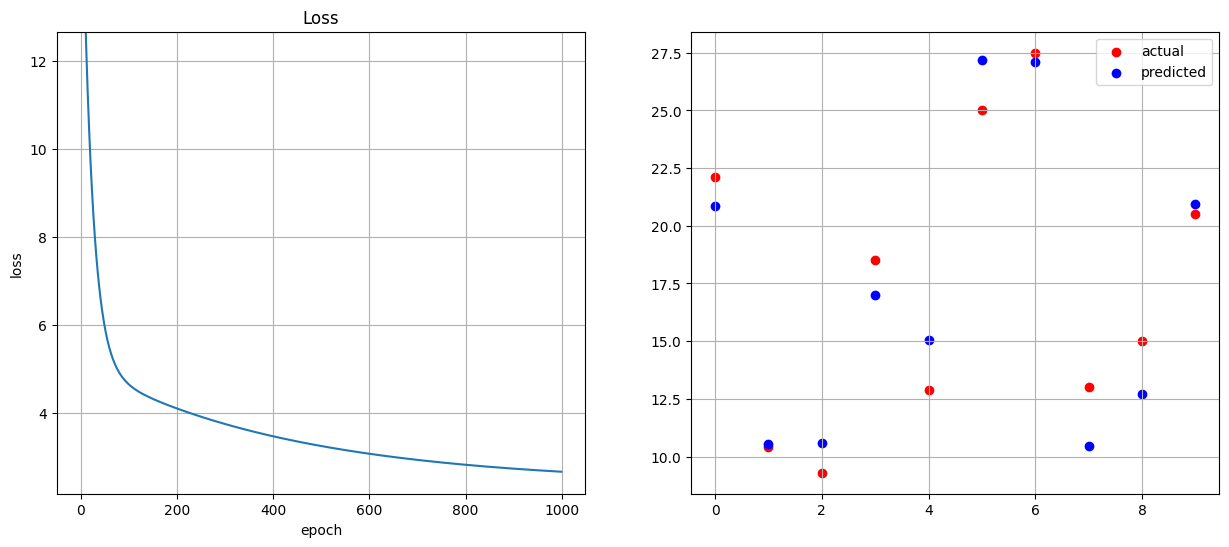

In [134]:
# 결과 시각화

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.ylim(min(losses)-0.5, min(losses)+10)
plt.title("Loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(losses)
plt.grid()

plt.subplot(1, 2, 2)
actual = y.numpy()
predicted = model(x).detach().numpy()
plt.scatter(range(len(actual)), actual, color="r", label="actual")
plt.scatter(range(len(actual)), predicted, color="b", label="predicted")
plt.legend()
plt.grid()

In [130]:
for name, param in model.named_parameters():
    print(f"{name} : {param.data}")

linear.weight : tensor([[0.2044, 0.3662, 0.0603]])
linear.bias : tensor([-0.3200])
